In [2]:
import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np

In [3]:
(train_data,train_label),(test_data,test_label) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 2s 0us/step


## **Basic Neural Network**

In [64]:
def model(input_shape=(28,28)):
    Input = tf.keras.Input(input_shape)
    flatten = tf.keras.layers.Flatten()(Input)
    hd1 = tf.keras.layers.Dense(240,activation='relu')(flatten)
    hd2 = tf.keras.layers.Dense(120,activation='relu')(hd1)
    out = tf.keras.layers.Dense(10,activation='softmax')(hd2)
    m = tf.keras.Model(inputs=Input,outputs=out)
    return m

In [65]:
nm = model()
nm.compile(loss='SparseCategoricalCrossentropy',optimizer='adam',metrics=['accuracy'])

In [66]:
nm.fit(train_data,train_label,validation_data=(test_data,test_label),epochs=8)

Epoch 1/8
1875/1875 [==============================] - 8s 4ms/step - loss: 1.2226 - accuracy: 0.8628 - val_loss: 0.3192 - val_accuracy: 0.9180
Epoch 2/8
1875/1875 [==============================] - 7s 3ms/step - loss: 0.2442 - accuracy: 0.9334 - val_loss: 0.2511 - val_accuracy: 0.9276
Epoch 3/8
1875/1875 [==============================] - 7s 4ms/step - loss: 0.1771 - accuracy: 0.9514 - val_loss: 0.1775 - val_accuracy: 0.9531
Epoch 4/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1586 - accuracy: 0.9579 - val_loss: 0.1672 - val_accuracy: 0.9552
Epoch 5/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1405 - accuracy: 0.9637 - val_loss: 0.1648 - val_accuracy: 0.9565
Epoch 6/8
1875/1875 [==============================] - 6s 3ms/step - loss: 0.1214 - accuracy: 0.9680 - val_loss: 0.1266 - val_accuracy: 0.9691
Epoch 7/8
1875/1875 [==============================] - 9s 5ms/step - loss: 0.1151 - accuracy: 0.9706 - val_loss: 0.1632 - val_accuracy: 0.9622

## **Peforming a Adversarial Attack**

In [80]:
img,label = tf.cast(train_data[1]/255,dtype=tf.float32),train_label[1]

In [81]:
label

0

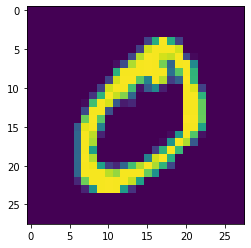

In [82]:
plt.imshow(img)

In [53]:
loss_func = tf.keras.losses.SparseCategoricalCrossentropy()

In [83]:
np.argmax(nm.predict(train_data[1][None,...]))

1/1 [==============================] - 0s 139ms/step


0

## Fast Gradient Sign method

In [84]:
def create_noise(image,label):
    with tf.GradientTape() as tape:
        tape.watch(image)
        pred = nm(image)
        loss = loss_func(label,pred)
    
    gradient = tape.gradient(loss,image)
    signed_grad = tf.sign(gradient)
    return signed_grad

In [85]:
test_img = img[None,...]

In [86]:
perbutation = create_noise(test_img,label)

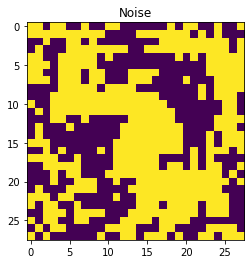

In [87]:
plt.title('Noise')
plt.imshow(perbutation[0])

## Attack on original Image

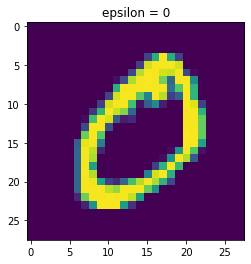

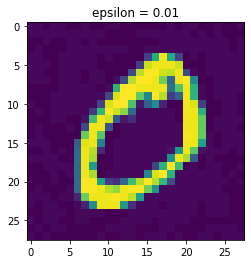

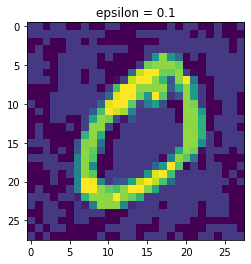

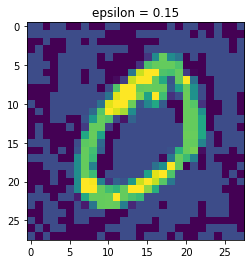

In [88]:
epsilon = [0,0.01,0.1,0.15]
for i in epsilon:
    adv_x = img + i*perbutation[0]
    plt.title('epsilon = {}'.format(i))
    plt.imshow(adv_x)
    plt.show()

## Final effected image

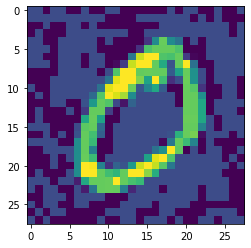

In [89]:
plt.imshow(adv_x)

# Prediction on Effected Image

In [90]:
np.argmax(nm.predict(tf.expand_dims(adv_x,0)))

1/1 [==============================] - 0s 19ms/step


8

## Prediction on Original Image

In [93]:
np.argmax(nm.predict(train_data[1][None,...]))

1/1 [==============================] - 0s 20ms/step


0

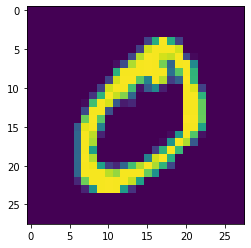

In [94]:
plt.imshow(img)